In [2]:
# Necessary libraries 
import SimpleITK as sitk
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dicom2nifti
import os 
import fnmatch
import scipy as scpy
import itk
from itkwidgets import view
import itkwidgets
import matplotlib
import ipywidgets
from os import walk
import glob as glob
import natsort
import time as time

In [14]:
# Hard-coded variables

mother_folder       =        '/Users/lalith/Documents/PANDA'
epsilon             =        5 #units in percent
niftiFiles          =        glob.glob(os.path.join(mother_folder,'*nii'))
total_num_files     =        len(niftiFiles)    
niftiFiles          =        natsort.natsorted(niftiFiles,reverse=False)
pet_frames          =       np.arange(1,len(niftiFiles)+1)


In [15]:
# The part that measures shannon-entropy for structural finger-printing
total_intensity_list=[]
itk_fixed=sitk.ReadImage(os.path.join(mother_folder,niftiFiles[len(niftiFiles)-1]))
for x in tqdm(range(1,(len(niftiFiles)+1))):
    time.sleep(0.25)
    itk_moved=sitk.ReadImage(os.path.join(mother_folder,niftiFiles[x-1]))
    moved_img= sitk.GetArrayFromImage(sitk.Gradient(itk_moved))
    fixed_img=sitk.GetArrayFromImage(sitk.Gradient(itk_fixed))
    total_intensity=np.sum(moved_img)
    total_intensity_list.append(total_intensity)
    ref_intensity=np.sum(fixed_img)
    
src_total_intensity                         =     np.array(total_intensity_list)
ref_total_intensity                         =     np.array(ref_intensity)
similarity_Frames                           =     np.array(abs(src_total_intensity /ref_total_intensity)*100)
selected_frames                             =     similarity_Frames>epsilon # Lesser it is better similarity
frames_where_gans_can_be_applied            =     np.where(selected_frames==True)
len(similarity_Frames)




  0%|          | 0/37 [00:00<?, ?it/s]


  3%|▎         | 1/37 [00:00<00:32,  1.09it/s]


  5%|▌         | 2/37 [00:01<00:32,  1.08it/s]


  8%|▊         | 3/37 [00:02<00:31,  1.09it/s]


 11%|█         | 4/37 [00:03<00:30,  1.08it/s]


 14%|█▎        | 5/37 [00:04<00:29,  1.08it/s]


 16%|█▌        | 6/37 [00:05<00:28,  1.07it/s]


 19%|█▉        | 7/37 [00:06<00:28,  1.07it/s]


 22%|██▏       | 8/37 [00:07<00:27,  1.06it/s]


 24%|██▍       | 9/37 [00:08<00:26,  1.06it/s]


 27%|██▋       | 10/37 [00:09<00:26,  1.04it/s]


 30%|██▉       | 11/37 [00:10<00:24,  1.04it/s]


 32%|███▏      | 12/37 [00:11<00:23,  1.04it/s]


 35%|███▌      | 13/37 [00:12<00:22,  1.05it/s]


 38%|███▊      | 14/37 [00:13<00:21,  1.05it/s]


 41%|████      | 15/37 [00:14<00:20,  1.06it/s]


 43%|████▎     | 16/37 [00:15<00:19,  1.05it/s]


 46%|████▌     | 17/37 [00:16<00:18,  1.05it/s]


 49%|████▊     | 18/37 [00:17<00:18,  1.05it/s]


 51%|█████▏    | 19/37 [00:17<00:17,  1.06it/s]


 54%|█████▍    

37

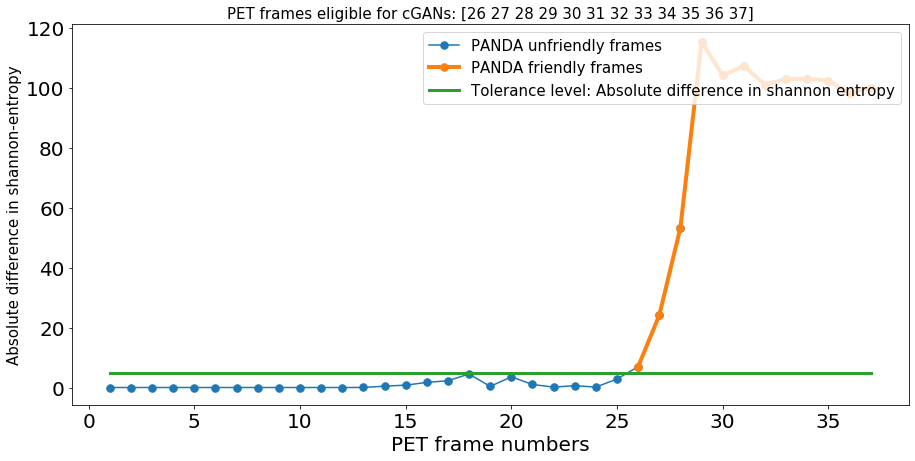

In [16]:
# Plot them all.
plt.rcParams['figure.figsize'] = [15, 7]
plt.title('PET frames eligible for cGANs: '+ str(pet_frames[similarity_Frames>epsilon]),size=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(pet_frames,similarity_Frames,'.-',markersize=15,label='PANDA unfriendly frames')
plt.plot(pet_frames[selected_frames],similarity_Frames[selected_frames],'.-',linewidth=4,markersize=15,label='PANDA friendly frames')
plt.plot(pet_frames,epsilon*np.ones(total_num_files),linewidth=3,label='Tolerance level: 5% of total counts in the reference frame')
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Percentage difference in total intensty', size=15)
plt.legend(loc="upper right",prop={"size":15})
plt.show()


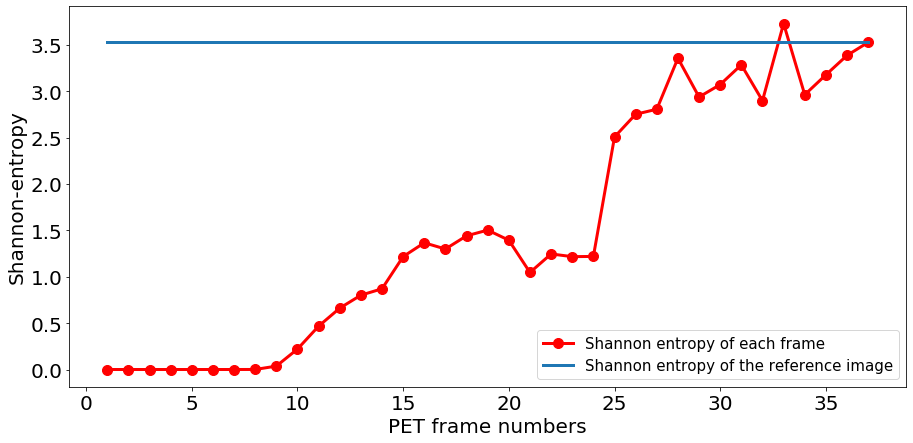

In [27]:
plt.plot(pet_frames,src_shannon_val,'ro-',linewidth=3,markersize=10,label='Shannon entropy of each frame')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Shannon-entropy', size=20)
plt.plot(pet_frames,ref_shannon_val*np.ones(total_num_files),linewidth=3,label='Shannon entropy of the reference image')
plt.legend(loc="lower right",prop={"size":15})
plt.show()
